<a href="https://colab.research.google.com/github/taniagiovani/myprojects-classmdl/blob/main/Classification_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import io
import pandas as pd

In [ ]:
df_train = pd.read_csv('/content/gdrive/MyDrive/Collab Dataset/Challenge 2/train.csv')
df_test = pd.read_csv('/content/gdrive/MyDrive/Collab Dataset/Challenge 2/test.csv')

In [ ]:
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [ ]:
df_train.shape, df_test.shape

((4250, 20), (750, 20))

In [ ]:
df_test = df_test.drop(['id'], axis = 1)

In [ ]:
categorical = ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']
numerical = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']

#Statistik Deskriptif

In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00


In [ ]:
df_train.corr().T

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
account_length,1.000000,-0.006626,-0.001612,0.023002,-0.001613,-0.010326,0.005535,-0.010322,-0.009916,-0.001846,-0.009942,0.004539,0.013690,0.004494,0.001002
number_vmail_messages,-0.006626,1.000000,0.002000,-0.006920,0.001994,0.010725,0.003593,0.010736,0.018308,0.001977,0.018300,0.005220,0.006585,0.005249,-0.015303
total_day_minutes,-0.001612,0.002000,1.000000,0.000747,1.000000,-0.013248,0.005986,-0.013258,0.010049,-0.004812,0.010036,-0.021369,0.003859,-0.021291,-0.002925
total_day_calls,0.023002,-0.006920,0.000747,1.000000,0.000751,0.008661,0.003739,0.008663,0.002206,-0.004815,0.002200,0.008834,0.009377,0.008909,-0.015845
total_day_charge,-0.001613,0.001994,1.000000,0.000751,1.000000,-0.013247,0.005985,-0.013257,0.010053,-0.004816,0.010040,-0.021374,0.003853,-0.021296,-0.002932
total_eve_minutes,-0.010326,0.010725,-0.013248,0.008661,-0.013247,1.000000,0.003101,1.000000,-0.014018,0.011973,-0.014031,-0.003509,0.012239,-0.003460,-0.010063
total_eve_calls,0.005535,0.003593,0.005986,0.003739,0.005985,0.003101,1.000000,0.003120,0.008425,-0.011929,0.008441,-0.013096,0.004949,-0.013145,0.006956
total_eve_charge,-0.010322,0.010736,-0.013258,0.008663,-0.013257,1.000000,0.003120,1.000000,-0.014022,0.011971,-0.014035,-0.003512,0.012239,-0.003463,-0.010071
total_night_minutes,-0.009916,0.018308,0.010049,0.002206,0.010053,-0.014018,0.008425,-0.014022,1.000000,0.023815,0.999999,-0.000113,-0.024280,-0.000047,-0.013771
total_night_calls,-0.001846,0.001977,-0.004812,-0.004815,-0.004816,0.011973,-0.011929,0.011971,0.023815,1.000000,0.023798,0.001093,0.003851,0.001054,-0.008893


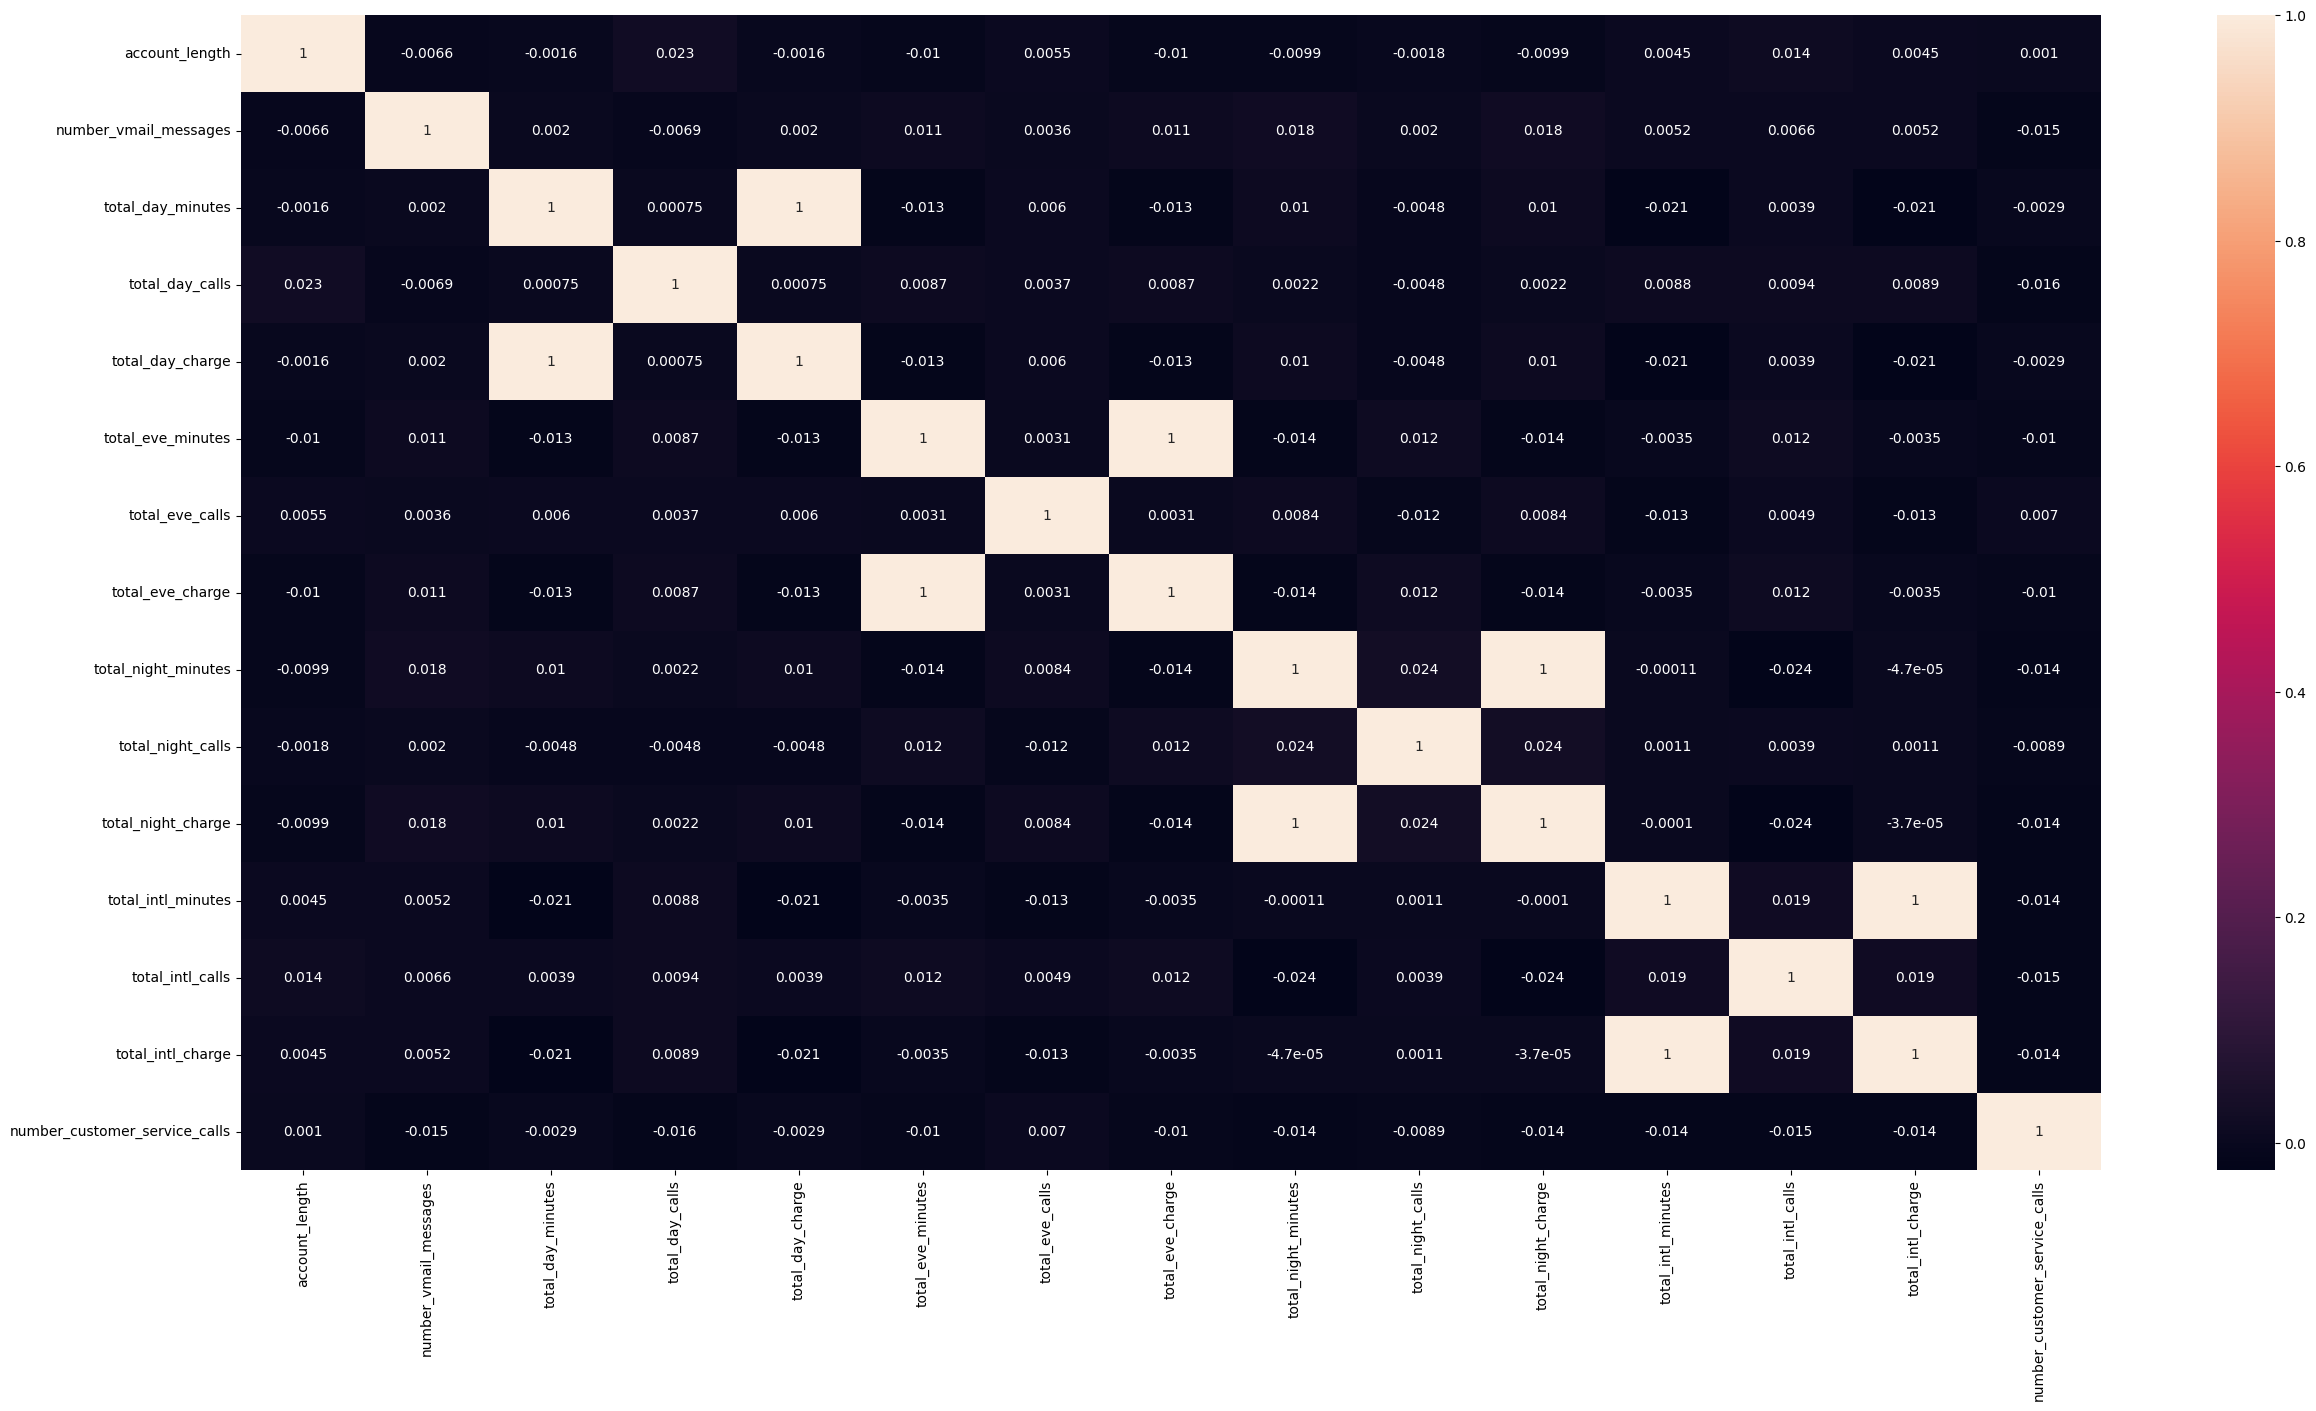

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30,15))
#generate a correlation matrix for the whole dataset
corrMatrix = df_train.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

##Check Missing Value and Duplicate Data

In [ ]:
df_train.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [ ]:
df_train.duplicated(subset=['state','area_code','total_day_minutes', 'total_eve_minutes']).sum()

0

##Outliers (IQR)

In [ ]:
from scipy import stats
import numpy as np

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_train)}')

filtered_entries = np.array([True] * len(df_train))
for col in ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_train[col] >= low_limit) & (df_train[col] <= high_limit)) & filtered_entries
    
df_train = df_train[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_train)}')

Jumlah baris sebelum memfilter outlier: 4250
Jumlah baris setelah memfilter outlier: 3515


##Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
lab = LabelEncoder()
df_train['state'] = lab.fit_transform(df_train['state'])
df_train['area_code'] = lab.fit_transform(df_train['area_code'])
df_train['international_plan'] = lab.fit_transform(df_train['international_plan'])
df_train['voice_mail_plan'] = lab.fit_transform(df_train['voice_mail_plan'])
df_train['churn'] = lab.fit_transform(df_train['churn'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3515 entries, 0 to 4248
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3515 non-null   int64  
 1   account_length                 3515 non-null   int64  
 2   area_code                      3515 non-null   int64  
 3   international_plan             3515 non-null   int64  
 4   voice_mail_plan                3515 non-null   int64  
 5   number_vmail_messages          3515 non-null   int64  
 6   total_day_minutes              3515 non-null   float64
 7   total_day_calls                3515 non-null   int64  
 8   total_day_charge               3515 non-null   float64
 9   total_eve_minutes              3515 non-null   float64
 10  total_eve_calls                3515 non-null   int64  
 11  total_eve_charge               3515 non-null   float64
 12  total_night_minutes            3515 non-null   f

In [ ]:
lab = LabelEncoder()
df_test['state'] = lab.fit_transform(df_test['state'])
df_test['area_code'] = lab.fit_transform(df_test['area_code'])
df_test['international_plan'] = lab.fit_transform(df_test['international_plan'])
df_test['voice_mail_plan'] = lab.fit_transform(df_test['voice_mail_plan'])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          750 non-null    int64  
 1   account_length                 750 non-null    int64  
 2   area_code                      750 non-null    int64  
 3   international_plan             750 non-null    int64  
 4   voice_mail_plan                750 non-null    int64  
 5   number_vmail_messages          750 non-null    int64  
 6   total_day_minutes              750 non-null    float64
 7   total_day_calls                750 non-null    int64  
 8   total_day_charge               750 non-null    float64
 9   total_eve_minutes              750 non-null    float64
 10  total_eve_calls                750 non-null    int64  
 11  total_eve_charge               750 non-null    float64
 12  total_night_minutes            750 non-null    flo

In [ ]:
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,24,147,1,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
7,49,141,1,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


##Correlation Map after Label Encoding

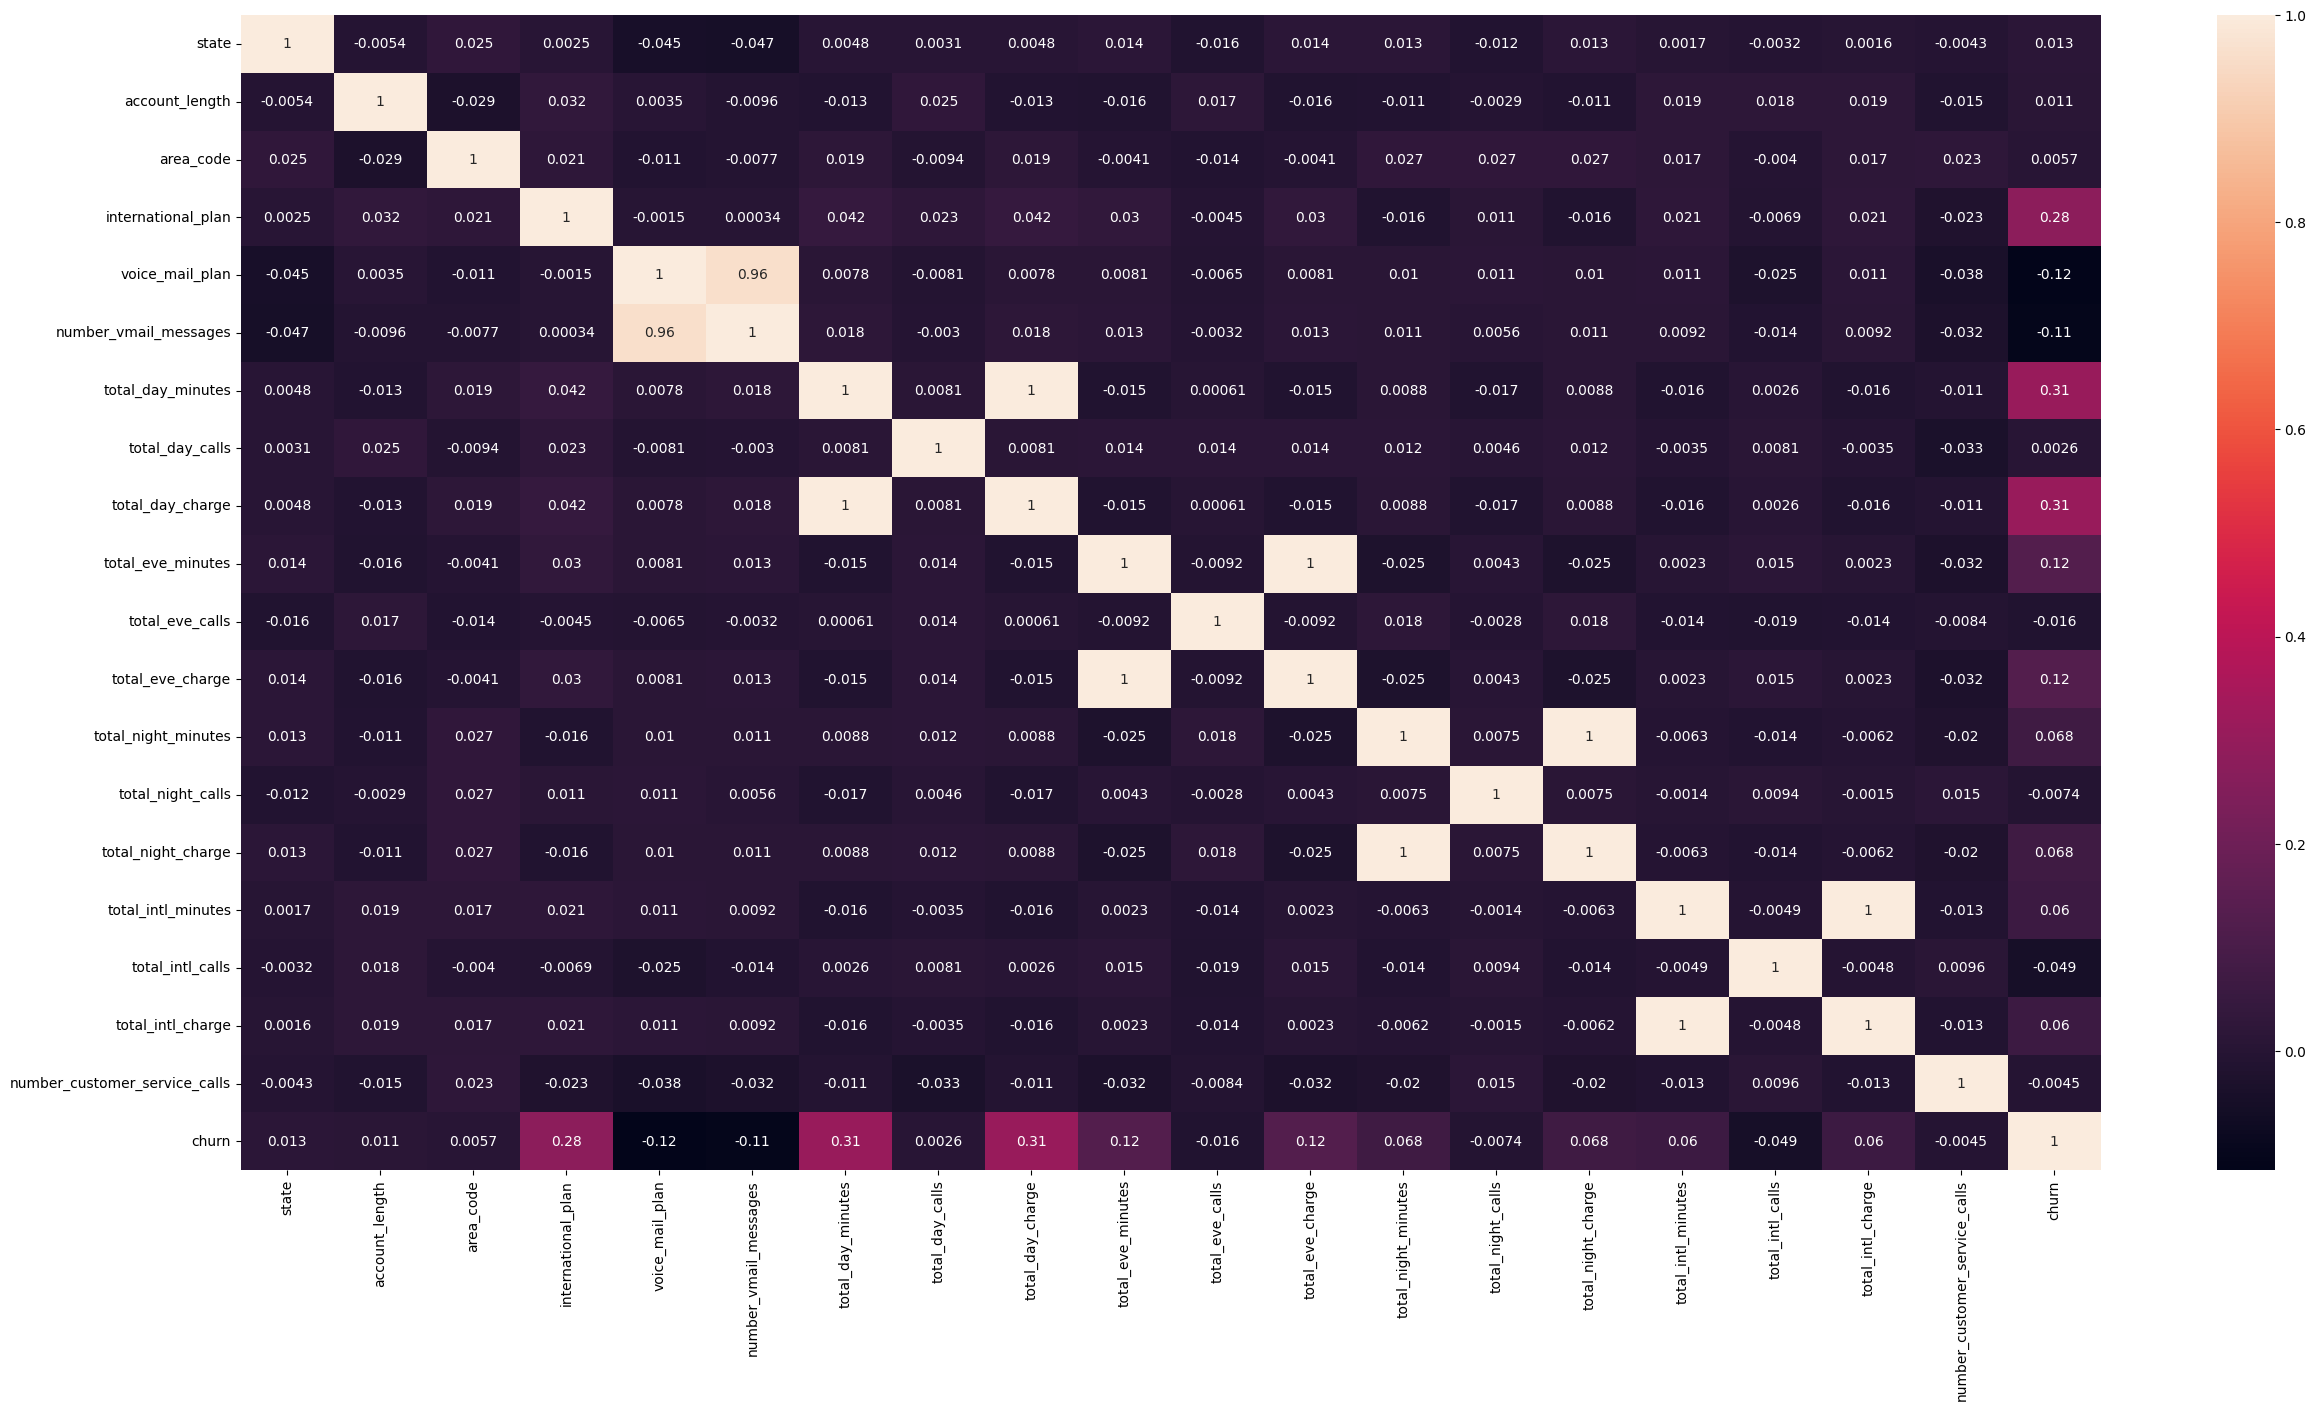

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30,15))
#generate a correlation matrix for the whole dataset
corrMatrix = df_train.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

##Normalization

In [ ]:
df_train.describe()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000
mean,26.063727,99.566145,0.996302,0.091038,0.248933,6.939687,180.081195,99.818208,30.614370,200.424780,100.026743,17.036327,200.859431,99.891038,9.038808,10.308791,4.257468,2.783898,1.303556,0.104694
std,14.719921,39.130022,0.709508,0.287705,0.432457,12.534587,52.636074,19.295141,8.948063,48.932659,19.438500,4.159313,48.584763,19.398227,2.186334,2.563978,2.074590,0.692227,0.975672,0.306203
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,34.500000,48.000000,5.870000,64.300000,47.000000,5.470000,67.700000,46.000000,3.050000,3.300000,1.000000,0.890000,0.000000,0.000000
25%,14.000000,73.000000,0.000000,0.000000,0.000000,0.000000,143.600000,87.000000,24.410000,166.850000,87.000000,14.185000,167.550000,87.000000,7.540000,8.600000,3.000000,2.320000,1.000000,0.000000
50%,26.000000,99.000000,1.000000,0.000000,0.000000,0.000000,180.200000,100.000000,30.630000,200.900000,100.000000,17.080000,201.000000,100.000000,9.050000,10.400000,4.000000,2.810000,1.000000,0.000000
75%,39.000000,127.000000,1.000000,0.000000,0.000000,0.000000,216.000000,113.000000,36.720000,233.700000,113.000000,19.860000,235.000000,113.000000,10.580000,12.000000,5.000000,3.240000,2.000000,0.000000
max,50.000000,204.000000,2.000000,1.000000,1.000000,40.000000,325.400000,152.000000,55.320000,335.000000,154.000000,28.480000,333.500000,153.000000,15.010000,17.200000,10.000000,4.640000,3.000000,1.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_train['account_length'] = MinMaxScaler().fit_transform(df_train['account_length'].values.reshape(len(df_train), 1))
df_train['number_vmail_messages'] = MinMaxScaler().fit_transform(df_train['number_vmail_messages'].values.reshape(len(df_train), 1))
df_train['total_day_minutes'] = MinMaxScaler().fit_transform(df_train['total_day_minutes'].values.reshape(len(df_train), 1))
df_train['total_day_calls'] = MinMaxScaler().fit_transform(df_train['total_day_calls'].values.reshape(len(df_train), 1))
df_train['total_day_charge'] = MinMaxScaler().fit_transform(df_train['total_day_charge'].values.reshape(len(df_train), 1))
df_train['total_eve_minutes'] = MinMaxScaler().fit_transform(df_train['total_eve_minutes'].values.reshape(len(df_train), 1))
df_train['total_eve_calls'] = MinMaxScaler().fit_transform(df_train['total_eve_calls'].values.reshape(len(df_train), 1))
df_train['total_eve_charge'] = MinMaxScaler().fit_transform(df_train['total_eve_charge'].values.reshape(len(df_train), 1))
df_train['total_night_minutes'] = MinMaxScaler().fit_transform(df_train['total_night_minutes'].values.reshape(len(df_train), 1))
df_train['total_night_calls'] = MinMaxScaler().fit_transform(df_train['total_night_calls'].values.reshape(len(df_train), 1))
df_train['total_night_charge'] = MinMaxScaler().fit_transform(df_train['total_night_charge'].values.reshape(len(df_train), 1))
df_train['total_intl_minutes'] = MinMaxScaler().fit_transform(df_train['total_intl_minutes'].values.reshape(len(df_train), 1))
df_train['total_intl_calls'] = MinMaxScaler().fit_transform(df_train['total_intl_calls'].values.reshape(len(df_train), 1))
df_train['total_intl_charge'] = MinMaxScaler().fit_transform(df_train['total_intl_charge'].values.reshape(len(df_train), 1))
df_train['number_customer_service_calls'] = MinMaxScaler().fit_transform(df_train['number_customer_service_calls'].values.reshape(len(df_train), 1))

In [ ]:
df_test['account_length'] = MinMaxScaler().fit_transform(df_test['account_length'].values.reshape(len(df_test), 1))
df_test['number_vmail_messages'] = MinMaxScaler().fit_transform(df_test['number_vmail_messages'].values.reshape(len(df_test), 1))
df_test['total_day_minutes'] = MinMaxScaler().fit_transform(df_test['total_day_minutes'].values.reshape(len(df_test), 1))
df_test['total_day_calls'] = MinMaxScaler().fit_transform(df_test['total_day_calls'].values.reshape(len(df_test), 1))
df_test['total_day_charge'] = MinMaxScaler().fit_transform(df_test['total_day_charge'].values.reshape(len(df_test), 1))
df_test['total_eve_minutes'] = MinMaxScaler().fit_transform(df_test['total_eve_minutes'].values.reshape(len(df_test), 1))
df_test['total_eve_calls'] = MinMaxScaler().fit_transform(df_test['total_eve_calls'].values.reshape(len(df_test), 1))
df_test['total_eve_charge'] = MinMaxScaler().fit_transform(df_test['total_eve_charge'].values.reshape(len(df_test), 1))
df_test['total_night_minutes'] = MinMaxScaler().fit_transform(df_test['total_night_minutes'].values.reshape(len(df_test), 1))
df_test['total_night_calls'] = MinMaxScaler().fit_transform(df_test['total_night_calls'].values.reshape(len(df_test), 1))
df_test['total_night_charge'] = MinMaxScaler().fit_transform(df_test['total_night_charge'].values.reshape(len(df_test), 1))
df_test['total_intl_minutes'] = MinMaxScaler().fit_transform(df_test['total_intl_minutes'].values.reshape(len(df_test), 1))
df_test['total_intl_calls'] = MinMaxScaler().fit_transform(df_test['total_intl_calls'].values.reshape(len(df_test), 1))
df_test['total_intl_charge'] = MinMaxScaler().fit_transform(df_test['total_intl_charge'].values.reshape(len(df_test), 1))
df_test['number_customer_service_calls'] = MinMaxScaler().fit_transform(df_test['number_customer_service_calls'].values.reshape(len(df_test), 1))

In [ ]:
df_train.describe()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000
mean,26.063727,0.485548,0.996302,0.091038,0.248933,0.173492,0.500451,0.498252,0.500392,0.502862,0.495577,0.502665,0.500976,0.503655,0.500736,0.504230,0.361941,0.505039,0.434519,0.104694
std,14.719921,0.192759,0.709508,0.287705,0.432457,0.313365,0.180942,0.185530,0.180952,0.180763,0.181668,0.180761,0.182787,0.181292,0.182804,0.184459,0.230510,0.184594,0.325224,0.306203
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,0.354680,0.000000,0.000000,0.000000,0.000000,0.375043,0.375000,0.374924,0.378833,0.373832,0.378748,0.375658,0.383178,0.375418,0.381295,0.222222,0.381333,0.333333,0.000000
50%,26.000000,0.482759,1.000000,0.000000,0.000000,0.000000,0.500859,0.500000,0.500708,0.504618,0.495327,0.504563,0.501505,0.504673,0.501672,0.510791,0.333333,0.512000,0.333333,0.000000
75%,39.000000,0.620690,1.000000,0.000000,0.000000,0.000000,0.623926,0.625000,0.623862,0.625785,0.616822,0.625380,0.629421,0.626168,0.629599,0.625899,0.444444,0.626667,0.666667,0.000000
max,50.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_test.describe()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,25.456000,0.419347,1.022667,0.102667,0.281333,0.165778,0.496467,0.497753,0.496399,0.517468,0.498215,0.517590,0.474536,0.566479,0.474669,0.544663,0.236070,0.545085,0.272444
std,14.995507,0.167506,0.695796,0.303726,0.449950,0.276936,0.157429,0.159020,0.157429,0.156949,0.152500,0.156958,0.164427,0.122982,0.164462,0.146579,0.127468,0.146609,0.212701
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,0.308017,1.000000,0.000000,0.000000,0.000000,0.396468,0.395161,0.396366,0.407820,0.393701,0.407909,0.362396,0.487179,0.362589,0.451058,0.157895,0.451961,0.166667
50%,26.000000,0.421941,1.000000,0.000000,0.000000,0.000000,0.489802,0.500000,0.489741,0.517744,0.503937,0.517870,0.473995,0.567308,0.474113,0.544974,0.210526,0.545098,0.166667
75%,38.000000,0.527426,2.000000,0.000000,1.000000,0.411765,0.601463,0.604839,0.601374,0.615865,0.598425,0.615977,0.586790,0.647436,0.586879,0.640212,0.315789,0.641176,0.333333
max,50.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3515 entries, 0 to 4248
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3515 non-null   int64  
 1   account_length                 3515 non-null   float64
 2   area_code                      3515 non-null   int64  
 3   international_plan             3515 non-null   int64  
 4   voice_mail_plan                3515 non-null   int64  
 5   number_vmail_messages          3515 non-null   float64
 6   total_day_minutes              3515 non-null   float64
 7   total_day_calls                3515 non-null   float64
 8   total_day_charge               3515 non-null   float64
 9   total_eve_minutes              3515 non-null   float64
 10  total_eve_calls                3515 non-null   float64
 11  total_eve_charge               3515 non-null   float64
 12  total_night_minutes            3515 non-null   f

##Define Variable

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

In [ ]:
x_train = df_train.drop(['churn'], axis = 1)
y_train = df_train['churn']

In [ ]:
X_train, X_val, Y_train, Y_val = model_selection.train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)

In [ ]:
print(X_train.shape[0], X_val.shape[0])

2812 703


#Logistic Regression Model

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

##Evaluation

In [ ]:
Y_val_pred = model.predict(X_val)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(Y_val, Y_val_pred)
precision = precision_score(Y_val, Y_val_pred)
recall = recall_score(Y_val, Y_val_pred)
f1 = f1_score(Y_val, Y_val_pred)
print('Accuracy:    {0:0.3f}%'.format(accuracy*100))
print('Precision:   {0:0.3f}%'.format(precision*100))
print('Recall:      {0:0.3f}%'.format(recall*100))
print('F1-Score:    {0:0.3f}%'.format(f1*100))

Accuracy:    91.892%
Precision:   76.667%
Recall:      31.507%
F1-Score:    44.660%


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_val, Y_val_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       630
           1       0.77      0.32      0.45        73

    accuracy                           0.92       703
   macro avg       0.85      0.65      0.70       703
weighted avg       0.91      0.92      0.90       703



##Full Dataset (Logistic Regression Model)

In [ ]:
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
x_test = df_test
y_test_pred = model.predict(x_test)

In [ ]:
y_test_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
np.unique(y_test_pred, return_counts = True)

(array([0, 1]), array([726,  24]))

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

##Predictions

In [ ]:
Y_val_pred2 = knn.predict(X_val)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(Y_val, Y_val_pred2)
precision = precision_score(Y_val, Y_val_pred2)
recall = recall_score(Y_val, Y_val_pred2)
f1 = f1_score(Y_val, Y_val_pred2)
print('Accuracy:    {0:0.3f}%'.format(accuracy*100))
print('Precision:   {0:0.3f}%'.format(precision*100))
print('Recall:      {0:0.3f}%'.format(recall*100))
print('F1-Score:    {0:0.3f}%'.format(f1*100))

Accuracy:    89.474%
Precision:   46.667%
Recall:      9.589%
F1-Score:    15.909%


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_val, Y_val_pred2))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       630
           1       0.86      0.33      0.48        73

    accuracy                           0.92       703
   macro avg       0.89      0.66      0.72       703
weighted avg       0.92      0.92      0.91       703



##Full Dataset (kNN Model)

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_test_pred2 = knn.predict(x_test)

In [ ]:
print(y_test_pred2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
np.unique(y_test_pred2, return_counts = True)

(array([0, 1]), array([735,  15]))

#Insert into Dataframe

In [ ]:
df_test['churn-logreg'] = y_test_pred
df_test['churn-knn'] = y_test_pred2
df_test

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn-logreg,churn-knn
0,16,0.535865,1,0,1,0.490196,0.746675,0.572581,0.746653,0.499850,...,0.500000,0.618379,0.506410,0.618440,0.529101,0.157895,0.529412,0.166667,0,0
1,1,0.493671,2,1,0,0.000000,0.623411,0.475806,0.623370,0.569624,...,0.569710,0.488194,0.679487,0.488652,0.333333,0.315789,0.333333,0.000000,1,0
2,12,0.257384,1,0,0,0.000000,0.319834,0.250000,0.319770,0.830075,...,0.830149,0.485322,0.557692,0.485816,0.693122,0.315789,0.694118,0.666667,0,0
3,46,0.388186,2,0,0,0.000000,0.526751,0.604839,0.526691,0.562406,...,0.562633,0.251117,0.698718,0.251064,0.428571,0.157895,0.429412,0.500000,0,0
4,29,0.729958,1,0,0,0.000000,0.330476,0.298387,0.330377,0.739549,...,0.739561,0.637524,0.660256,0.637589,0.820106,0.263158,0.821569,0.500000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,10,0.544304,1,0,0,0.000000,0.315992,0.483871,0.315945,0.586767,...,0.587049,0.484365,0.634615,0.484397,0.597884,0.368421,0.598039,0.000000,0,0
746,47,0.303797,0,0,0,0.000000,0.486846,0.637097,0.486698,0.719699,...,0.719745,0.609126,0.641026,0.609220,0.650794,0.105263,0.650980,0.500000,0,0
747,49,0.637131,1,0,0,0.000000,0.507538,0.411290,0.507390,0.678496,...,0.678698,0.519145,0.647436,0.519149,0.777778,0.105263,0.778431,0.500000,0,0
748,7,0.253165,1,0,0,0.000000,0.378658,0.403226,0.378543,0.425865,...,0.426044,0.515316,0.544872,0.515603,0.719577,0.210526,0.719608,0.166667,0,0
